In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
from skimage import exposure
import os
import cv2
import numpy as np
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix
from IPython.display import Image

In [14]:

# Function to extract HOG features from an image and visualize it
def extract_hog_features(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)

    # Calculate HOG features
    hog_features, hog_image = feature.hog(gray_image, visualize=True)

    # Enhance the contrast of the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled

In [ ]:


# Path to the root folder of your dataset
class_folder = "D:/fcai/Level 3/ML/section/age/part3"

# List all subdirectories (assuming each subdirectory corresponds to a class)
features_list=[]
labels_list=[]
age = []
gender = []
race = []
date_time = []

for image_filename in os.listdir(class_folder):
    image_path = os.path.join(class_folder, image_filename)
    
    #append age and geder and race for each image
    p = (image_filename.split('.')[0]).split('_')
    age.append(p[0])
    gender.append(p[1])
    # assign male and fmale
#     if p[1] == "0" :
#         gender.append("male")
#     else :
#         gender.append("fmale")
#     #assign White, Black, Asian, Indian, and Others 
#     if p[2] == '0':
#         race.append('White')
#     elif p[2] == '1':
#         race.append('Black')
#     elif p[2] == '2':
#         race.append('Asian')
#     elif p[2] == '3':
#         race.append('Indian')
#     elif p[2] == '4':
#         race.append('Others')
    race.append(p[2])
    date_time.append(p[3])

    # Load the image
    image = io.imread(image_path)
    #resize image into same saize 64*128
    image = cv2.resize(image, (64,64))

    # Extract HOG features and visualize
    hog_features, hog_image = extract_hog_features(image)

    # Display the original image and the HOG features
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2, 2), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)

    ax2.axis('off')
    ax2.imshow(hog_image, cmap=plt.cm.gray)

    plt.show()

    # Append HOG features to the features list
    features_list.append(hog_features)

    #not important
    # Append the label to the labels list
    labels_list.append(class_folder)



In [16]:
# Convert lists to NumPy arrays
features_array = np.array(features_list)
labels_array = np.array(labels_list)

#not important
# Use LabelEncoder to convert class names into numeric labels
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels_array)

print("\n*********************\n")
print(len(features_array))



*********************

3252


In [54]:
# Convert 'age' list to numpy array
age_array = np.array(age).reshape(-1, 1)  # Reshape as a column vector

# Convert 'gender' list to numpy array
gender_array = np.array(gender).reshape(-1, 1)  # Reshape as a column vector

# Convert 'race' list to numpy array
race_array = np.array(race).reshape(-1, 1)  # Reshape as a column vector

# Convert 'date_time' list to numpy array
date_time_array = np.array(date_time).reshape(-1, 1)  # Reshape as a column vector


# Create the dataset by horizontally stacking age_array with features_array
dataset = np.hstack((age_array,gender_array, race_array,date_time_array,features_array))

# Convert dataset to a pandas DataFrame
column_names = ['Age']+['Gender'] +['Race'] +['Date&Time'] + [f'Feature_{i}' for i in range(features_array.shape[1])]  # Creating column names
df = pd.DataFrame(dataset, columns=column_names)

In [55]:
# save dataset in my drive 
df.to_csv('age_whiout_sum.csv', index=False)

In [56]:
#load data from my devise 
dataset = pd.read_csv('age_whiout_sum.csv')


C:\Users\iRepair\AppData\Local\Temp\ipykernel_22708\4006389438.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('age_whiout_sum.csv')


In [57]:
dataset.head(5)

,Age,Gender,Race,Date&Time,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,...,Feature_2906,Feature_2907,Feature_2908,Feature_2909,Feature_2910,Feature_2911,Feature_2912,Feature_2913,Feature_2914,Feature_2915
0,100,1,0,20170119212053665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.105313,0.210356,0.063162,0.027130,0.033233,0.062907,0.007087,0.029493,0.014638,0.059388
1,10,0,0,20170116201102149,0.021221,0.022481,0.220955,0.220955,0.195880,0.090754,...,0.051861,0.240718,0.240718,0.126342,0.064562,0.045626,0.000000,0.003938,0.055610,0.079367
2,10,0,0,20170120220628194,0.252932,0.105968,0.057890,0.032553,0.123328,0.006724,...,0.010051,0.143671,0.008573,0.008531,0.000000,0.034993,0.004975,0.017171,0.052169,0.079247
3,10,0,1,20170116225209209,0.017564,0.005133,0.002044,0.004387,0.042466,0.040933,...,0.003040,0.245698,0.122011,0.006941,0.030092,0.141776,0.012963,0.050654,0.102396,0.092288
4,10,1,1,20170116225209209,0.020991,0.007497,0.016926,0.028936,0.079318,0.018473,...,0.224800,0.014928,0.000000,0.000000,0.001942,0.026500,0.003167,0.007885,0.012504,0.031704


In [58]:
print(dataset.shape)
print(len(numeric_labels))

(3252, 2920)
3252


In [59]:
# normalization agea 
dataset['Age'] = MinMaxScaler(feature_range=(0,1)).fit_transform(dataset[['Age']] )

In [60]:
dataset.head()

,Age,Gender,Race,Date&Time,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,...,Feature_2906,Feature_2907,Feature_2908,Feature_2909,Feature_2910,Feature_2911,Feature_2912,Feature_2913,Feature_2914,Feature_2915
0,0.860870,1,0,20170119212053665,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.105313,0.210356,0.063162,0.027130,0.033233,0.062907,0.007087,0.029493,0.014638,0.059388
1,0.078261,0,0,20170116201102149,0.021221,0.022481,0.220955,0.220955,0.195880,0.090754,...,0.051861,0.240718,0.240718,0.126342,0.064562,0.045626,0.000000,0.003938,0.055610,0.079367
2,0.078261,0,0,20170120220628194,0.252932,0.105968,0.057890,0.032553,0.123328,0.006724,...,0.010051,0.143671,0.008573,0.008531,0.000000,0.034993,0.004975,0.017171,0.052169,0.079247
3,0.078261,0,1,20170116225209209,0.017564,0.005133,0.002044,0.004387,0.042466,0.040933,...,0.003040,0.245698,0.122011,0.006941,0.030092,0.141776,0.012963,0.050654,0.102396,0.092288
4,0.078261,1,1,20170116225209209,0.020991,0.007497,0.016926,0.028936,0.079318,0.018473,...,0.224800,0.014928,0.000000,0.000000,0.001942,0.026500,0.003167,0.007885,0.012504,0.031704


In [61]:
# drop Date&Time because not important
dataset.drop('Date&Time', axis=1, inplace=True) 

In [63]:
dataset.head(2)

,Age,Gender,Race,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_2906,Feature_2907,Feature_2908,Feature_2909,Feature_2910,Feature_2911,Feature_2912,Feature_2913,Feature_2914,Feature_2915
0,0.860870,1,0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.105313,0.210356,0.063162,0.027130,0.033233,0.062907,0.007087,0.029493,0.014638,0.059388
1,0.078261,0,0,0.021221,0.022481,0.220955,0.220955,0.19588,0.090754,0.033301,...,0.051861,0.240718,0.240718,0.126342,0.064562,0.045626,0.000000,0.003938,0.055610,0.079367


In [77]:
#spliot into featurs and target 
data_x = dataset.drop(dataset.columns[1], axis=1)  #Featurs all expect gender 
data_y = dataset.iloc[:, 1]   #Target only gender

In [78]:
data_x.head(3)

,Age,Race,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,...,Feature_2906,Feature_2907,Feature_2908,Feature_2909,Feature_2910,Feature_2911,Feature_2912,Feature_2913,Feature_2914,Feature_2915
0,0.860870,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.105313,0.210356,0.063162,0.027130,0.033233,0.062907,0.007087,0.029493,0.014638,0.059388
1,0.078261,0,0.021221,0.022481,0.220955,0.220955,0.195880,0.090754,0.033301,0.000000,...,0.051861,0.240718,0.240718,0.126342,0.064562,0.045626,0.000000,0.003938,0.055610,0.079367
2,0.078261,0,0.252932,0.105968,0.057890,0.032553,0.123328,0.006724,0.001473,0.005925,...,0.010051,0.143671,0.008573,0.008531,0.000000,0.034993,0.004975,0.017171,0.052169,0.079247


In [79]:
data_y.head(3)

0    1
1    0
2    0
Name: Gender, dtype: int64

In [80]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [81]:
print("X_Treain",X_train.shape)
print("X_Test",X_test.shape)
print("y_Treain",y_train.shape)
print("X_Test",y_test.shape)

X_Treain (2601, 2918)
X_Test (651, 2918)
y_Treain (2601,)
X_Test (651,)


In [82]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2601, 2918)
(651, 2918)
(2601,)
(651,)


# Logistic Regression Model

In [83]:
# Logistic Regression
lr = LogisticRegression(penalty='l2',solver='saga',C=1.0,random_state=11)

In [84]:
lr.fit(X_train, y_train)

C:\Users\iRepair\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=11, solver='saga')

In [85]:
# prediction
y_pred = lr.predict(X_test)

In [86]:
# prediction
y_pred = lr.predict(X_test)
# test and train score 
print("(Logistic Regression)Train Score :",lr.score(X_train,y_train)) 
print("(Logistic Regression)Teast Score :",lr.score(X_test,y_test))

(Logistic Regression)Train Score : 0.8796616685890042
(Logistic Regression)Teast Score : 0.7741935483870968


In [87]:
# classes
print("Classes is : ",lr.classes_)

Classes is :  [0 1]


In [88]:
# Itreations 
print("Itreations is : ",lr.n_iter_)

Itreations is :  [100]


In [89]:
#  intercept_ 
print("Intercept is : ",lr.intercept_)

Intercept is :  [-4.80416957]


In [90]:
#   coef_
print("coef is : ",lr.coef_)

coef is :  [[ 0.34647411 -0.25750874 -0.22118827 ... -0.54864663  0.31745939
   0.5321811 ]]


In [91]:
# Get parameters for this estimator.
print("Prediction  : ",lr.predict(X_test)[:10])

Prediction  :  [0 1 0 0 1 0 0 0 0 0]


In [92]:
#  Predict class labels for samples in X.
print("Prediction Probabilities : ",lr.predict_proba(X_test)[:2])

Prediction Probabilities :  [[0.99488642 0.00511358]
 [0.26929526 0.73070474]]


# Metrics

In [106]:
#Calculating Confusion Matrix 
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :")
print(cm)

Confusion Matrix :
[[388  63]
 [ 84 116]]


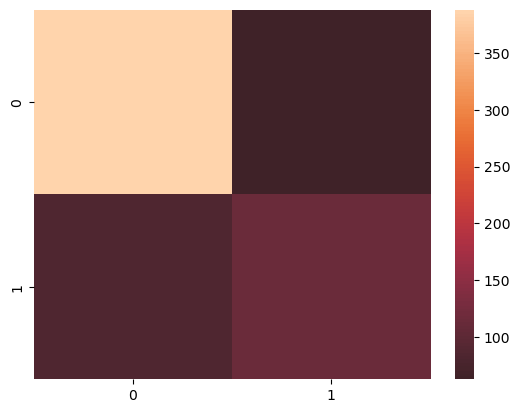

In [94]:
# plot confusion matrix 
sns.heatmap(cm, center = True) 
plt.show() 

In [95]:
#Calculating Accuracy Score 
acScore = accuracy_score(y_test,y_pred,normalize=False)
print("Accuracy Score : ",acScore)

Accuracy Score :  504


In [96]:
#Calculating F1 Score  
F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples 
print('F1 Score is : ', F1Score) 

F1 Score is :  0.7741935483870968


In [97]:
#Calculating Recall Score  
RecallScore = recall_score(y_test, y_pred, average='micro') 
print('Recall Score is : ', RecallScore)

Recall Score is :  0.7741935483870968


In [98]:
#Calculating Precision Score 
PrecisionScore = precision_score(y_test, y_pred, average='micro')
print('Precision Score is : ', PrecisionScore) 

Precision Score is :  0.7741935483870968


In [99]:
#Calculating Precision recall Score  
PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro') 
print('Precision Recall Score is : ', PrecisionRecallScore)

Precision Recall Score is :  (0.7741935483870968, 0.7741935483870968, 0.7741935483870968, None)


In [100]:
#Calculating Precision recall Curve 
PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred) 
print('Precision Value is : ', PrecisionValue) 
print('Recall Value is : ', RecallValue) 
print('Thresholds Value is : ', ThresholdsValue) 

Precision Value is :  [0.30721966 0.64804469 1.        ]
Recall Value is :  [1.   0.58 0.  ]
Thresholds Value is :  [0 1]


In [101]:
#Calculating classification Report 
ClassificationReport = classification_report(y_test,y_pred) 
print('Classification Report is : ', ClassificationReport ) 

Classification Report is :                precision    recall  f1-score   support

           0       0.82      0.86      0.84       451
           1       0.65      0.58      0.61       200

    accuracy                           0.77       651
   macro avg       0.74      0.72      0.73       651
weighted avg       0.77      0.77      0.77       651



In [102]:
#Calculating Area Under the Curve :   
fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred) 
AUCValue = auc(fprValue2, tprValue2) 
print('AUC Value  : ', AUCValue)

AUC Value  :  0.7201552106430156


In [103]:
#Calculating Receiver Operating Characteristic 
fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred) 
print('fpr Value  : ', fprValue) 
print('tpr Value  : ', tprValue) 
print('thresholds Value  : ', thresholdsValue) 

fpr Value  :  [0.         0.13968958 1.        ]
tpr Value  :  [0.   0.58 1.  ]
thresholds Value  :  [inf  1.  0.]


In [104]:
#Calculating ROC AUC Score:   
ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') 
print('ROCAUC Score : ', ROCAUCScore) 

ROCAUC Score :  0.7201552106430156


In [105]:
#Calculating Zero One Loss: 
ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False)  
print('Zero One Loss Value : ', ZeroOneLossValue )

Zero One Loss Value :  147
